In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from pathlib import Path

In [46]:

def getSymbolInformation(symbolProbability):
    return -math.log(symbolProbability, 2.0)

def getNullSourceEntropy(S):
    N = sum(S.values())
    symbolsProbability = map(lambda x: x/N, S.values())
    symbolsInformation = map(lambda s : getSymbolInformation(s)*s, symbolsProbability)
    entropy = sum(symbolsInformation)
    return entropy

#• Cantidad de información de cada símbolo comparado con la entropía de la red.

def probabilityOfDir(index, ip, S):
    total = 0
    for d,v in S.items():
        if d == ip:
            total += v
    N = sum(S.values())
    return total/N

def generateHostDstEntropyTable(S1History):
    cols = ["ENTROPY"]
    rows = [[getNullSourceEntropy(S)] for S in S1History]
    dfTable = pd.DataFrame(rows, columns=cols)
    dfTable.to_csv("..\\results\\hostDstEntropyTable.csv", index=False, header=True)
    
def generateSymbolProbabilityTable(S1History):
    cols = S1History[-1].keys()
    rows = [[probabilityOfDir(1, ip, S) for ip in cols] for S in S1History]
    dfTable = pd.DataFrame(rows, columns=cols)
    dfTable.to_csv("..\\results\\ARPSymbolProbabilityTable.csv", index=False, header=True)

# Experimentos

In [47]:
addressProbabilityTable = pd.read_csv("..\\results\\addressProbabilityTable.csv");
entropyTable = pd.read_csv("..\\results\\entropyTable.csv");
protocolProbabilityTable = pd.read_csv("..\\results\\protocolProbabilityTable.csv");
symbolInformationTable = pd.read_csv("..\\results\\symbolInformationTable.csv");
hostSrcTable = pd.read_csv("..\\results\\hostSrcTable.csv");
hostDstTable = pd.read_csv("..\\results\\hostDstTable.csv");

In [48]:
S2 = {}
S2History = []
symbols = hostDstTable.columns
for index, row in hostDstTable.iterrows():
    for i in range(len(row)):
        if row[i] != 0:
            S2[symbols[i]] = row[i]
    if len(S2) > 0:
        S2History.append(S2.copy())
generateHostDstEntropyTable(S2History)
for key in S2History[-1].keys():
    print(key)
generateSymbolProbabilityTable(S2History)
hostDstEntropyTable = pd.read_csv("..\\results\\hostDstEntropyTable.csv");
hostDstInfoTable = pd.read_csv("..\\results\\ARPSymbolProbabilityTable.csv");
print(len(S2History))

192.168.0.98
192.168.0.1
192.168.0.2
192.168.0.187
192.168.0.226
192.168.0.35
192.168.0.159
192.168.0.208
192.168.0.252
555


## Graficos de tablas

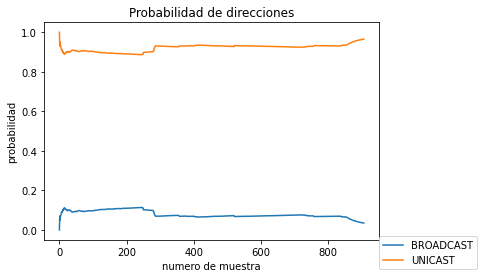

     BROADCAST   UNICAST
906   0.034618  0.965382


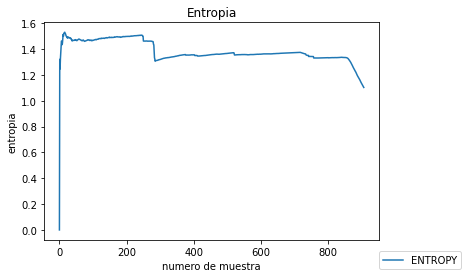

      ENTROPY
906  1.103753


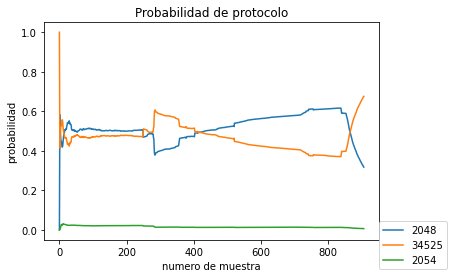

         2048     34525      2054
906  0.317741  0.675656  0.006602


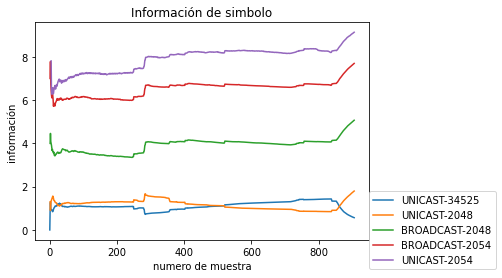

     UNICAST-34525  UNICAST-2048  BROADCAST-2048  BROADCAST-2054  UNICAST-2054
906       0.565639       1.79612        5.068861        7.695266      9.136041


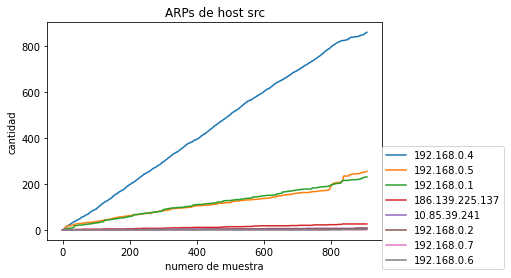

     192.168.0.4  192.168.0.5  192.168.0.1  186.139.225.137  10.85.39.241  \
906        862.0        255.0        231.0             26.0           7.0   

     192.168.0.2  192.168.0.7  192.168.0.6  
906          8.0          1.0          3.0  


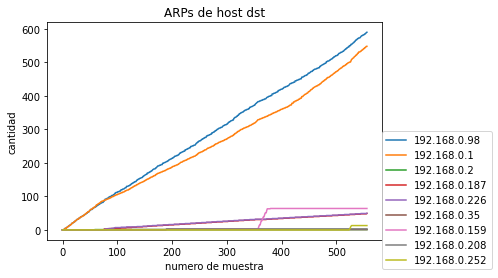

     192.168.0.98  192.168.0.1  192.168.0.2  192.168.0.187  192.168.0.226  \
556         590.0        548.0          1.0           49.0           50.0   

     192.168.0.35  192.168.0.159  192.168.0.208  192.168.0.252  
556           1.0           64.0            3.0           13.0  


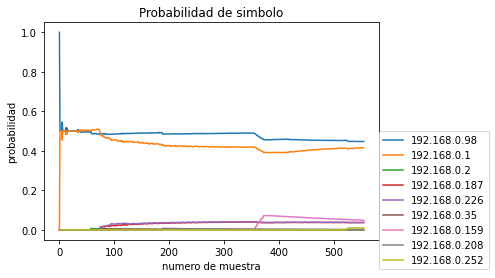

     192.168.0.98  192.168.0.1  192.168.0.2  192.168.0.187  192.168.0.226  \
554      0.447309     0.415466     0.000758       0.037149       0.037908   

     192.168.0.35  192.168.0.159  192.168.0.208  192.168.0.252  
554      0.000758       0.048522       0.002274       0.009856  


In [49]:
Path("..\\figures").mkdir(parents=True, exist_ok=True)
tables = [
    [addressProbabilityTable,"Probabilidad de direcciones","probabilidad"],
    [entropyTable,"Entropia","entropia"],
    [protocolProbabilityTable,"Probabilidad de protocolo","probabilidad"],
    [symbolInformationTable,"Información de simbolo","información"],
    [hostSrcTable,"ARPs de host src","cantidad"],
    [hostDstTable,"ARPs de host dst","cantidad"],
    [hostDstInfoTable,"Probabilidad de simbolo","probabilidad"],
]
for table, name, yAxis in tables:
    a = 0
    for dir in table.columns:
        plt.plot(table[dir], label=dir)
    plt.title(name)
    plt.legend(table.columns)
    plt.ylabel(yAxis)
    plt.xlabel("numero de muestra")
    plt.legend(table.columns,loc = (1,-0.135))
    plt.savefig(f"..\\figures\\ARP{name.replace(' ','')}T.svg");
    plt.show()
    print(table.iloc[[-1]])


Time: Wed May  5 00:00:07 2021
totalPackets: 103914
entropy: 0.8227150592033562
symbol                  probability     information
('UNICAST', '0x86dd')   0.75069         0.41371
('UNICAST', '0x800')    0.24807         2.01118
('UNICAST', '0x806')    0.00090         10.11044
('BROADCAST', '0x806')  0.00029         11.75814
('BROADCAST', '0x800')  0.00005         14.34310
BROADCAST % 0.000337
UNICAST % 0.999663
0x800 % 0.248119
0x86dd % 0.750688
0x806 % 0.001193
30 mins corriendo